In [1]:
# Library imports
import numpy as np
import numpy.random as nr
import scipy.stats as stats
import matplotlib.pyplot as plt
from tqdm import tqdm
from simulation_strats import *

In [2]:
# Creating the arena for the fly to exist in 
arena_x = 100
arena_y = 20

# Odor diffusion radius
odor_radius = 4
odor_diffusion_chance = 0.9
max_odor_loss_coeff = 0.05

# Maximum odor value
max_odor = 1
odor_decay_coeff = 0.99

# Probability of an odor packet
odor_packet_prob = 0.005

# Value of an odor packet
odor_packet_value = 0.75

# Fly behavior is random, can choose to move in any direction
# generating a starting fly position

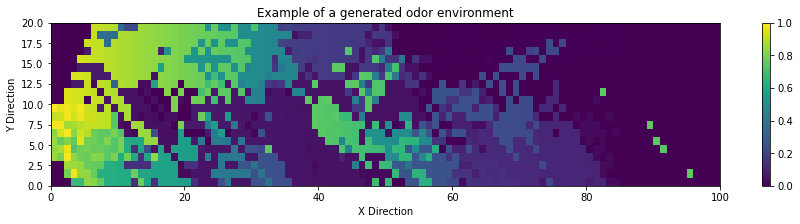

In [8]:
# Code to generate and display the odor environment
# Using a random process to generate the environment
arena_odor = np.zeros((arena_y, arena_x))
starting_position_x = nr.randint(1, arena_x / 10)
starting_position_y = nr.randint(1, arena_y)

# Now generating the diffusion of odor in the environment as spread by wind
# Area immediately around starting odor position has relatively high chance to have odor present
for i in np.arange(-1 * odor_radius + 1, odor_radius, 1):
   for j in np.arange(-1 * odor_radius + 1, odor_radius, 1):
      if i**2 + j**2 <= odor_radius**2 and starting_position_y + i >= 0 and starting_position_x + j >= 0 and starting_position_y + i < arena_y:
         # Then draw to determine how strong the odor is in a given position
         odor_loss = (odor_radius - i) * nr.rand()* max_odor_loss_coeff
         arena_odor[i + starting_position_y, j + starting_position_x] = max_odor - odor_loss

# Giving the maximum value
arena_odor[starting_position_y, starting_position_x] = max_odor

# Now generating odor drift across the rows
# Odor has a chance to be generated when either the pixel any adjacent pixel to the right (including diagonals)
# has odor present
# The odor decay is generated by sampling from a given distribution
# First trial will be Poisson
for j in np.arange(starting_position_x, arena_x):
   for i in np.arange(arena_y):
      if arena_odor[i, j] == 0:
         possible_parents = []

         # Finding the possible parent pixels for the odor
         if i-2 > 0:
            if arena_odor[i-2, j-1] != 0:
               possible_parents.append((i-2, j-1))

         if i-1 > 0:
            if arena_odor[i-1, j-1] != 0:
               possible_parents.append((i-1, j-1))

         if arena_odor[i, j-1] != 0:
            possible_parents.append((i, j-1))

         if i+1 < arena_y:
            if arena_odor[i+1, j-1] != 0:
               possible_parents.append((i+1, j-1))

         if i+2 < arena_y:
            if arena_odor[i+2, j-1] != 0:
               possible_parents.append((i+2, j-1))
         
         # Choosing the parent pixel
         if len(possible_parents) > 0:
            pixel_parent_ind = nr.randint(0, len(possible_parents))
            pixel_parent = possible_parents[pixel_parent_ind]

            # Now generating the decay
            decay_coeff = nr.exponential(15) 

            # Passing on the odor
            arena_odor[i, j] = np.min([arena_odor[pixel_parent] * decay_coeff, arena_odor[pixel_parent] * odor_decay_coeff])
         
         if nr.rand() < odor_packet_prob:
            arena_odor[i, j] = odor_packet_value

plt.figure(figsize=(15, 3))
plt.pcolormesh(arena_odor)
plt.xlabel('X Direction')
plt.ylabel('Y Direction')
plt.title('Example of a generated odor environment')
plt.colorbar()
plt.savefig('./images/odor_env_various_sens.png', dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
# Generating success rates for a number of refresh rates and sensitivity values for a fixed odor radius=7
# odor_sensitivity_values = [0.05, 0.1,  0.2, 0.4, 0.6, 0.8, 0.95]
# refresh_rate_values = [0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 0.95]
# strat1_success_rates = np.zeros((len(odor_sensitivity_values), len(refresh_rate_values)))
# strat2_success_rates = np.zeros((len(odor_sensitivity_values), len(refresh_rate_values)))
# strat3_success_rates = np.zeros((len(odor_sensitivity_values), len(refresh_rate_values)))
# strat4_success_rates = np.zeros((len(odor_sensitivity_values), len(refresh_rate_values)))
# for i, j in enumerate(odor_sensitivity_values):
#    for k, l in enumerate(refresh_rate_values):
#       num_suc, num_trials = strat1(arena_odor, starting_position_x, starting_position_y, odor_radius, fly_sensitivity=j, refresh_rate=l)
#       strat1_success_rates[i, k] = num_suc / num_trials
#       num_suc, num_trials = strat2(arena_odor, starting_position_x, starting_position_y, odor_radius, fly_sensitivity=j, refresh_rate=l)
#       strat2_success_rates[i, k] = num_suc / num_trials
#       num_suc, num_trials = strat3(arena_odor, starting_position_x, starting_position_y, odor_radius, fly_sensitivity=j, refresh_rate=l)
#       strat3_success_rates[i, k] = num_suc / num_trials
#       num_suc, num_trials = strat4(arena_odor, starting_position_x, starting_position_y, odor_radius, fly_sensitivity=j, refresh_rate=l)
#       strat4_success_rates[i, k] = num_suc / num_trials

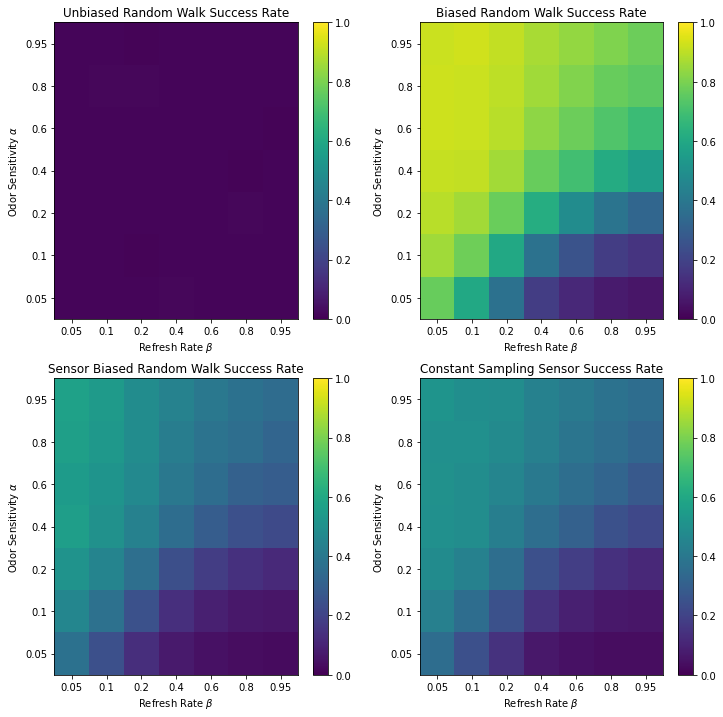

In [31]:
# plt.figure(figsize=(12, 12))
# plt.subplot(2, 2, 1)
# plt.pcolormesh(strat1_success_rates, vmin=0, vmax=1)
# plt.xticks(ticks=np.arange(len(odor_sensitivity_values)) + 0.5, labels=odor_sensitivity_values)
# plt.yticks(ticks=np.arange(len(refresh_rate_values)) + 0.5, labels=refresh_rate_values)
# plt.ylabel('Odor Sensitivity $\\alpha$')
# plt.xlabel('Refresh Rate $\\beta$')
# plt.title('Unbiased Random Walk Success Rate')
# plt.colorbar()
# plt.subplot(2, 2, 2)
# plt.pcolormesh(strat2_success_rates, vmin=0, vmax=1)
# plt.xticks(ticks=np.arange(len(odor_sensitivity_values)) + 0.5, labels=odor_sensitivity_values)
# plt.yticks(ticks=np.arange(len(refresh_rate_values)) + 0.5, labels=refresh_rate_values)
# plt.ylabel('Odor Sensitivity $\\alpha$')
# plt.xlabel('Refresh Rate $\\beta$')
# plt.title('Biased Random Walk Success Rate')
# plt.colorbar()
# plt.subplot(2, 2, 3)
# plt.pcolormesh(strat3_success_rates, vmin=0, vmax=1)
# plt.xticks(ticks=np.arange(len(odor_sensitivity_values)) + 0.5, labels=odor_sensitivity_values)
# plt.yticks(ticks=np.arange(len(refresh_rate_values)) + 0.5, labels=refresh_rate_values)
# plt.ylabel('Odor Sensitivity $\\alpha$')
# plt.xlabel('Refresh Rate $\\beta$')
# plt.title('Sensor Biased Random Walk Success Rate')
# plt.colorbar()
# plt.subplot(2, 2, 4)
# plt.pcolormesh(strat4_success_rates, vmin=0, vmax=1)
# plt.xticks(ticks=np.arange(len(odor_sensitivity_values)) + 0.5, labels=odor_sensitivity_values)
# plt.yticks(ticks=np.arange(len(refresh_rate_values)) + 0.5, labels=refresh_rate_values)
# plt.ylabel('Odor Sensitivity $\\alpha$')
# plt.xlabel('Refresh Rate $\\beta$')
# plt.title('Constant Sampling Sensor Success Rate')
# plt.colorbar()
# plt.savefig('./images/alpha_beta_success.png', dpi=100, bbox_inches='tight')
# plt.show()

In [ ]:
odor_radii = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
starting_position_x = nr.randint(1, arena_x / 10)
starting_position_y = nr.randint(1, arena_y)
strat1_success_rate = []
strat2_success_rate = []
strat3_success_rate = []
strat4_success_rate = []

for odor_radius_i in odor_radii:
   # Code to generate and display the odor environment
   # Using a random process to generate the environment
   arena_odor = np.zeros((arena_y, arena_x))

   # Now generating the diffusion of odor in the environment as spread by wind
   # Area immediately around starting odor position has relatively high chance to have odor present
   for i in np.arange(-1 * odor_radius_i + 1, odor_radius_i, 1):
      for j in np.arange(-1 * odor_radius_i + 1, odor_radius_i, 1):
         if i**2 + j**2 <= odor_radius_i**2 and starting_position_y + i >= 0 and starting_position_x + j >= 0 and starting_position_y + i < arena_y:
            # Then draw to determine how strong the odor is in a given position
            odor_loss = (odor_radius_i - i) * nr.rand()* max_odor_loss_coeff
            arena_odor[i + starting_position_y, j + starting_position_x] = max_odor - odor_loss

   # Giving the maximum value
   arena_odor[starting_position_y, starting_position_x] = max_odor

   # Now generating odor drift across the rows
   # Odor has a chance to be generated when either the pixel any adjacent pixel to the right (including diagonals)
   # has odor present
   # The odor decay is generated by sampling from a given distribution
   # First trial will be Poisson
   for j in np.arange(starting_position_x, arena_x):
      for i in np.arange(arena_y):
         if arena_odor[i, j] == 0:
            possible_parents = []

            # Finding the possible parent pixels for the odor
            if i-2 > 0:
               if arena_odor[i-2, j-1] != 0:
                  possible_parents.append((i-2, j-1))

            if i-1 > 0:
               if arena_odor[i-1, j-1] != 0:
                  possible_parents.append((i-1, j-1))

            if arena_odor[i, j-1] != 0:
               possible_parents.append((i, j-1))

            if i+1 < arena_y:
               if arena_odor[i+1, j-1] != 0:
                  possible_parents.append((i+1, j-1))

            if i+2 < arena_y:
               if arena_odor[i+2, j-1] != 0:
                  possible_parents.append((i+2, j-1))
            
            # Choosing the parent pixel
            if len(possible_parents) > 0:
               pixel_parent_ind = nr.randint(0, len(possible_parents))
               pixel_parent = possible_parents[pixel_parent_ind]

               # Now generating the decay
               decay_coeff = nr.exponential(15) 

               # Passing on the odor
               arena_odor[i, j] = np.min([arena_odor[pixel_parent] * decay_coeff, arena_odor[pixel_parent] * odor_decay_coeff])
            
            if nr.rand() < odor_packet_prob:
               arena_odor[i, j] = odor_packet_value

   num_suc, num_trials = strat1(arena_odor, starting_position_x, starting_position_y, odor_radius_i, fly_sensitivity=0.10, refresh_rate=0.10)
   strat1_success_rate.append(num_suc/num_trials)
   num_suc, num_trials = strat2(arena_odor, starting_position_x, starting_position_y, odor_radius_i, fly_sensitivity=0.10, refresh_rate=0.10)
   strat2_success_rate.append(num_suc/num_trials)
   num_suc, num_trials = strat3(arena_odor, starting_position_x, starting_position_y, odor_radius_i, fly_sensitivity=0.10, refresh_rate=0.10)
   strat3_success_rate.append(num_suc/num_trials)
   num_suc, num_trials = strat4(arena_odor, starting_position_x, starting_position_y, odor_radius_i, fly_sensitivity=0.10, refresh_rate=0.10)
   strat4_success_rate.append(num_suc/num_trials)
   



In [41]:
strat1_success_rate

[0.015, 0.0123, 0.0181, 0.0128, 0.0178, 0.019, 0.0295, 0.0229, 0.0371, 0.0285]

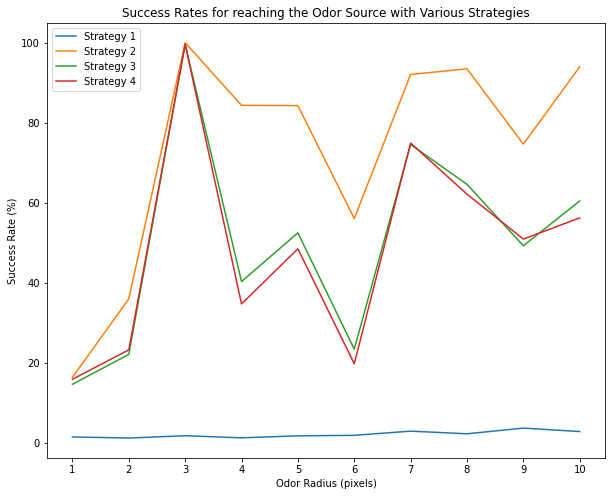

In [50]:
plt.figure(figsize=(10,8))
plt.plot(np.array(strat1_success_rate)*100, label='Strategy 1')
plt.plot(np.array(strat2_success_rate)*100, label='Strategy 2')
plt.plot(np.array(strat3_success_rate)*100, label='Strategy 3')
plt.plot(np.array(strat4_success_rate)*100, label='Strategy 4')
plt.title('Success Rates for reaching the Odor Source with Various Strategies')
plt.xticks(np.arange(0, 10), labels=np.arange(1, 11))
plt.xlabel('Odor Radius (pixels)')
plt.ylabel('Success Rate (%)')
plt.legend()
plt.savefig('./images/success_odor_radius.png', dpi=100, bbox_inches='tight')
plt.show()